In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
sns.set_theme()

In [2]:
games = pd.read_csv('top100videogamesales.csv')

In [11]:
games.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Nintendo,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Mario Kart Wii,Nintendo,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
2,3,Wii Sports Resort,Nintendo,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
3,4,New Super Mario Bros.,Nintendo,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
4,5,Wii Play,Nintendo,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02


### Regional Sales by Publisher

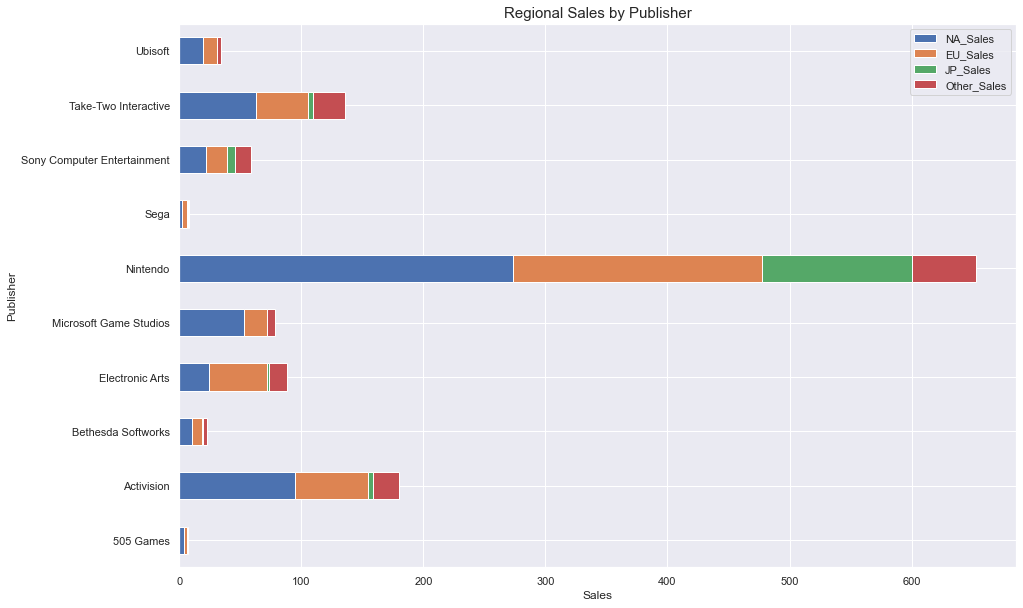

In [63]:
region = games[['Publisher', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
sales_region = region.groupby(['Publisher']).sum()
sales_region.plot(kind='barh', stacked=True, figsize=(15,10))

plt.title('Regional Sales by Publisher', fontsize=15)
plt.xlabel('Sales', fontsize=12)
plt.ylabel('Publisher', fontsize=12)
plt.show()

Nintendo has the highest global sale

### Global Sales by Year

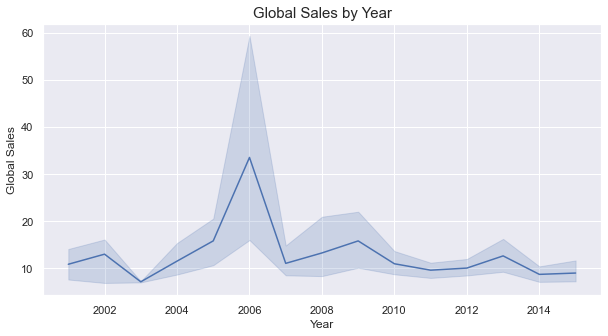

In [17]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=games, x='Year', y='Global_Sales')
plt.title('Global Sales by Year', fontsize=15)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Global Sales', fontsize=12)
plt.show()

the highest global sales was in 2006

###  Global Sales Distribution for Action Games

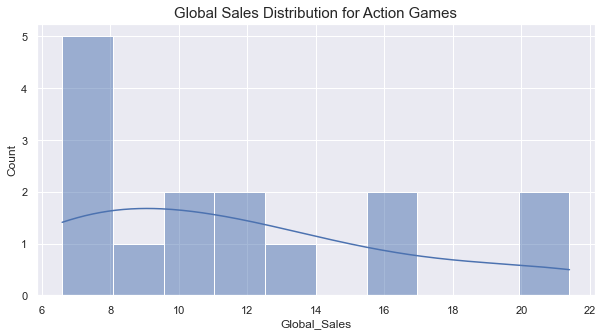

In [49]:
plt.figure(figsize=(10, 5))

action_games = games[games['Genre']=='Action']
sns.histplot(data=action_games, x='Global_Sales', bins=10, kde=True)

plt.title('Global Sales Distribution for Action Games', fontsize=15)
plt.show()

The most global sales is between 6.5 - 10

###  North American Sales by Genre

C:\Users\jasmi\AppData\Local\Temp\ipykernel_32560\2082332655.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales.loc['Other'] = other


Text(0, 0.5, '')

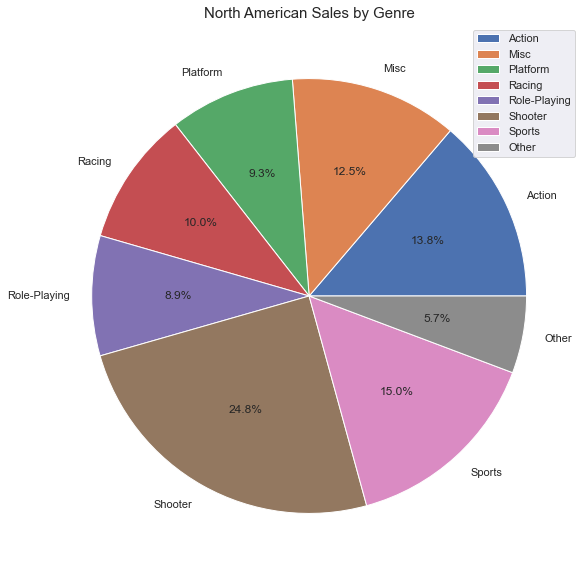

In [109]:
sales_NA = games[['Genre', 'NA_Sales']]
sales_NA = sales_NA.groupby('Genre').sum()

other = sales_NA[sales_NA['NA_Sales'] < 15].sum()
sales = sales_NA[sales_NA['NA_Sales'] > 15]

sales.loc['Other'] = other

sales.plot.pie(y='NA_Sales',autopct='%1.1f%%',figsize=(10, 10))
plt.title('North American Sales by Genre', fontsize=15)
plt.ylabel('')

The other category includes the following Genres with Sales amounts:

Fighting 14.4

Puzzle 3.44 

Simulation 14.61

The higest sales comes from the Shooter genre

###  European Sales by Genre: Create a pie chart to show the percentage of sales each genre had in the European market. (Group smaller “slices” together into an “other” category to create an easier to read chart) Detail what is included in the other category. Explain the chart using markdown.

C:\Users\jasmi\AppData\Local\Temp\ipykernel_32560\1931152690.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales.loc['Other'] = other


Text(0, 0.5, '')

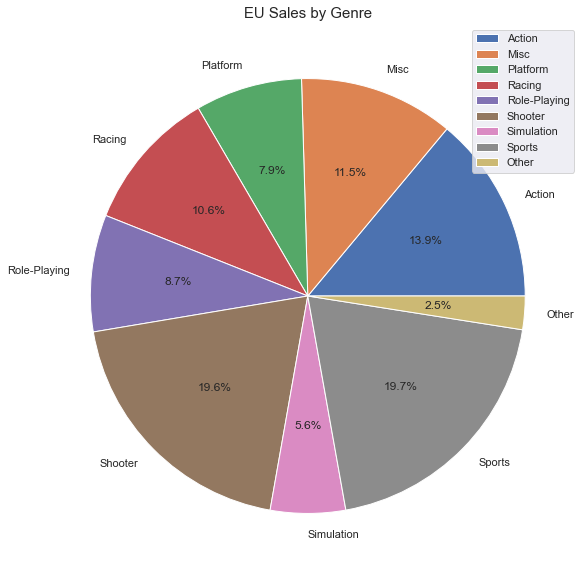

In [112]:
sales_EU = games[['Genre', 'EU_Sales']]
sales_EU = sales_EU.groupby('Genre').sum()

other = sales_EU[sales_EU['EU_Sales'] < 15].sum()
sales = sales_EU[sales_EU['EU_Sales'] > 15]

sales.loc['Other'] = other

sales.plot.pie(y='EU_Sales',autopct='%1.1f%%',figsize=(10, 10))
plt.title('EU Sales by Genre', fontsize=15)
plt.ylabel('')

The other category includes the following Genres with Sales amounts:

Fighting 5

Puzzle 5.36

The highes sales is made by the sports genre followed very closely by the shooter genre

###  Explain differences and similarities between the North American and European charts in markdown.

Similarities:

top 3 genres for both are Shooter, Sports, Action

other category includes Fighting & Puzzle

Differences:

top Genre in NA is Shooting, in EU it's Sports

the gap between the top genre and the second in EU is a lot smaller than in NA

###  Count of Games by Platform

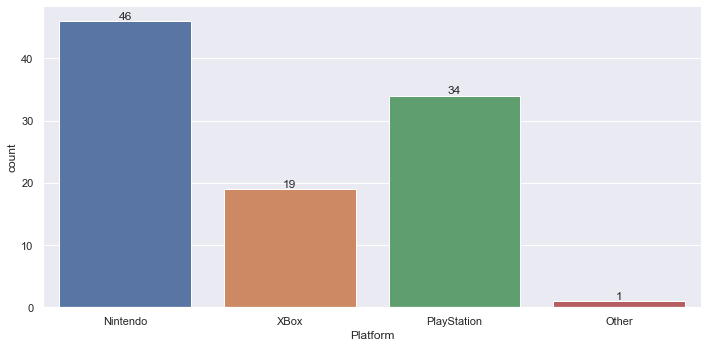

In [32]:
count = sns.catplot(data=games, x='Platform', kind='count', aspect=2)
for ax in count.axes.flat:
    ax.bar_label(ax.containers[0])

The most games were published by Nintendo